<a href="https://colab.research.google.com/github/abhinav-codanaut/DL-2020-fast-ai-/blob/main/L2_image_scraping_DDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Source - https://towardsdatascience.com/classifying-cats-vs-dogs-a-beginners-guide-to-deep-learning-4469ffed086c

''' from a image scrapping tutorial and building a simple dog/cat DL classifier using fast ai '''


In [2]:
!pip install -q jmd_imagescraper

In [3]:
!pip install -Uqq fastbook

import fastbook  #import the fast.ai library
from fastbook import *  #dont't worry, it's designed to work with import *
fastbook.setup_book()
from fastai.vision.widgets import *

#import the image scraper by @JoeDockrill, website: https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

     |████████████████████████████████| 727kB 8.4MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 16.8MB/s 
     |████████████████████████████████| 204kB 49.7MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
Mounted at /content/gdrive


In [4]:
animals=['cat','dog']
path = Path().cwd()/"animals"#assigns path to current working directory

In [5]:
duckduckgo_search(path,"cat","cats",max_results=100) #downloads 100 images of 'cats' and saves it in path/cat

Duckduckgo search: cats


[Path('/content/animals/cat/001_03f272a1.jpg'),
 Path('/content/animals/cat/002_b6a1684c.jpg'),
 Path('/content/animals/cat/003_e0e98779.jpg'),
 Path('/content/animals/cat/004_59acbc5f.jpg'),
 Path('/content/animals/cat/005_48c9e7ea.jpg'),
 Path('/content/animals/cat/006_6e107742.jpg'),
 Path('/content/animals/cat/007_a4be7ee6.jpg'),
 Path('/content/animals/cat/008_d7267500.jpg'),
 Path('/content/animals/cat/009_6d7f55d3.jpg'),
 Path('/content/animals/cat/010_aef50faf.jpg'),
 Path('/content/animals/cat/011_0ebf8a13.jpg'),
 Path('/content/animals/cat/012_47744541.jpg'),
 Path('/content/animals/cat/013_a93c8712.jpg'),
 Path('/content/animals/cat/014_743d21b9.jpg'),
 Path('/content/animals/cat/015_6e9053f8.jpg'),
 Path('/content/animals/cat/016_c30811b6.jpg'),
 Path('/content/animals/cat/017_ce6f924c.jpg'),
 Path('/content/animals/cat/018_fef56d94.jpg'),
 Path('/content/animals/cat/019_d7ae2272.jpg'),
 Path('/content/animals/cat/020_569526cd.jpg'),
 Path('/content/animals/cat/021_507095b6

In [6]:
duckduckgo_search(path,"dog","dogs",max_results=100)#downloads 100 images of 'dogs' and saves it in path/dog

Duckduckgo search: dogs


[Path('/content/animals/dog/001_185ef65a.jpg'),
 Path('/content/animals/dog/002_2b330acf.jpg'),
 Path('/content/animals/dog/003_19da9da0.jpg'),
 Path('/content/animals/dog/004_bf7965e3.jpg'),
 Path('/content/animals/dog/005_5405dff2.jpg'),
 Path('/content/animals/dog/006_a53e72da.jpg'),
 Path('/content/animals/dog/007_016fe3c0.jpg'),
 Path('/content/animals/dog/008_ff84fbec.jpg'),
 Path('/content/animals/dog/009_83eefd6a.jpg'),
 Path('/content/animals/dog/010_d17b3ca3.jpg'),
 Path('/content/animals/dog/011_643d9dba.jpg'),
 Path('/content/animals/dog/012_824988d6.jpg'),
 Path('/content/animals/dog/013_2227d18d.jpg'),
 Path('/content/animals/dog/014_e528fae1.jpg'),
 Path('/content/animals/dog/015_d83829d9.jpg'),
 Path('/content/animals/dog/016_aa6f9e56.jpg'),
 Path('/content/animals/dog/017_01e05b8c.jpg'),
 Path('/content/animals/dog/018_d6b67b73.jpg'),
 Path('/content/animals/dog/019_4b58c6dc.jpg'),
 Path('/content/animals/dog/020_6e7ff140.jpg'),
 Path('/content/animals/dog/021_d02fbd14

In [7]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [13]:
fns=get_image_files(path)
fns

(#200) [Path('/content/animals/dog/021_d02fbd14.jpg'),Path('/content/animals/dog/017_01e05b8c.jpg'),Path('/content/animals/dog/041_8123f7f4.jpg'),Path('/content/animals/dog/040_ddfdd2de.jpg'),Path('/content/animals/dog/086_756d3f54.jpg'),Path('/content/animals/dog/100_4cf31b45.jpg'),Path('/content/animals/dog/006_a53e72da.jpg'),Path('/content/animals/dog/097_74ea2e8b.jpg'),Path('/content/animals/dog/032_56685991.jpg'),Path('/content/animals/dog/074_eade7510.jpg')...]

In [14]:
fns[5]

Path('/content/animals/dog/100_4cf31b45.jpg')

In [9]:
failed=verify_images(fns)#looks for files that arent images
failed

(#0) []

In [10]:
failed.map(Path.unlink);#unlinks the failed files from the folder

In [11]:
animals=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),#splits the dataset into a training set and validation set
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [12]:
dls=animals.dataloaders(path)

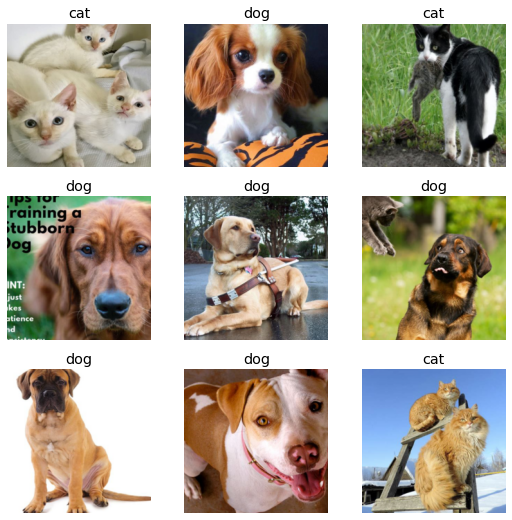

In [17]:
dls.valid.show_batch(max_n=9,nrows=3)

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)#training our model
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.551206,1.201024,0.450000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.463582,0.485435,0.175000,00:01
1,0.362289,0.126380,0.075000,00:01
2,0.298677,0.050832,0.025000,00:01
3,0.229728,0.031728,0.000000,00:01


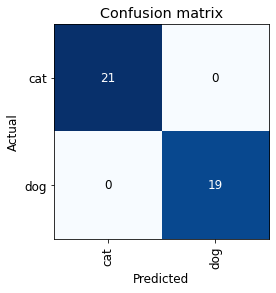

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()#plots a confusion matrix

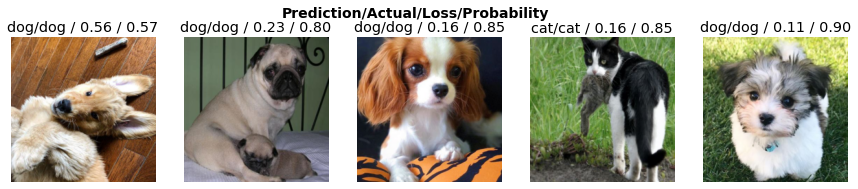

In [21]:
interp.plot_top_losses(5, nrows=1)

In [22]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload()#Displays a widget which can be used to upload images from your system
btn_upload

FileUpload(value={}, description='Upload')

In [23]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))#resizes the uloaded image
out_pl

Output()

In [24]:
pred,pred_idx,probs = learn_inf.predict(img)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred

Label(value='Prediction: dog; Probability: 1.0000')